In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### SVM

In [28]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

X = pd.read_csv('final_training_data.csv', index_col=0).drop(columns=['grade', 'username'])
y = pd.read_csv('final_training_data.csv').loc[:,'grade'] #1 is failed grade, 0 is pass
print(y.value_counts())

scaler = preprocessing.StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

#clf = svm.SVC(kernel='linear', C = 1.0, )
C = [x for x in range(1,50)]
#cv_scores = []
#for c in C:
pipeline = make_pipeline(preprocessing.StandardScaler(), SelectFromModel(LogisticRegression(), max_features=45, threshold=-np.inf), svm.SVC())
scoring = ['roc_auc', 'average_precision', 'recall', 'precision', 'f1', 'accuracy']
param_grid = [
  {'svc__C': [1, 5, 10, 100, 1000], 'svc__kernel': ['linear']},
  {'svc__C': [1, 5, 10, 100, 1000], 'svc__gamma': [0.01, 0.001, 0.0001], 'svc__kernel': ['rbf']},
 ]
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='average_precision')
grid_search.fit(X_train, y_train)
#cv_scores.append(np.mean(scores['test_roc_auc']))
print("Best parameters: {}".format(grid_search.best_params_))
print(f'Best score: {grid_search.best_score_}')
#print(f'optimal C: {cv_scores.index(max(cv_scores)) + 1}')
#print(f'best score: {max(cv_scores)}')

#plt.plot(C, cv_scores)
#plt.xlabel('Value of hyperparameter C')
#plt.ylabel('Parameter score')
#plt.show()

#print(np.mean(scores['test_roc_auc']))
#scores = cross_val_score(clf, X)

#y_pred = clf.predict(X_test_transformed)

#print(f'Linear svm accuracy: {metrics.accuracy_score(y_test, y_pred)}')
#print(f'Linear svm precision: {metrics.precision_score(y_test, y_pred)}')
#print(f'Linear svm recall: {metrics.recall_score(y_test, y_pred)}')

0    183
1     37
Name: grade, dtype: int64
Best parameters: {'svc__C': 1000, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best score: 0.6281497222820752


aucpr: 0.7411826268969126
aucroc: 0.892857142857143


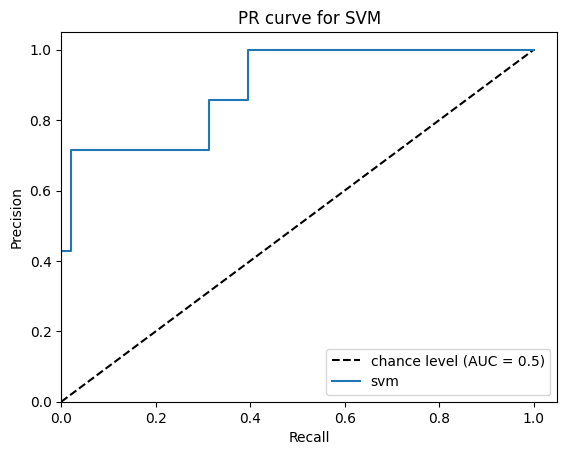

In [31]:
y_pr=grid_search.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pr)
print(f"aucpr: {metrics.average_precision_score(y_test, y_pr)}")
print(f"aucroc: {metrics.roc_auc_score(y_test, y_pr)}")
#print(f"precision: {metrics.precision_score(y_test, y_pr)}")
#print(f"recall: {metrics.recall_score(y_test, y_pr)}")
#print(f"f1: {metrics.f1_score(y_test, y_pr)}")
plt.plot([0,1], [0,1], 'k--', label="chance level (AUC = 0.5)")
plt.plot(fpr, tpr, label="svm")
plt.legend(loc="lower right", prop={'size': 10})
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve for SVM')
plt.show()

In [15]:
pd.DataFrame(grid_search.cv_results_).to_csv('svm_results.csv')
#pd.DataFrame(tpr).to_csv('tpr_svm.csv')
#pd.DataFrame(fpr).to_csv('fpr_svm.csv')

In [71]:
thing = pd.read_csv('final_training_data_backup.csv', index_col=0)
thing['grade'] = thing['grade'].replace({1: 0, 0: 1}) 
#thing.to_csv('final_training_data.csv')